In [1]:
import folium 
import pandas as pd 

In [2]:
churn = pd.read_csv('data/cell_phone_churn.csv')

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null bool
dtypes: bool(1), float64(8), int64(8), object(3)
memory usage: 498.1+ KB


In [4]:
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
churn.groupby('state')['churn'].count()

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: churn, dtype: int64

In [12]:
churn[churn['state'] == 'KS']

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
179,KS,70,408,no,no,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False
258,KS,92,408,yes,no,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
287,KS,137,408,no,no,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False
368,KS,132,415,no,no,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False
379,KS,127,415,no,no,0,221.0,100,37.57,160.7,113,13.66,233.1,96,10.49,6.8,4,1.84,2,False
385,KS,137,415,no,no,0,230.2,113,39.13,220.4,79,18.73,204.7,111,9.21,10.7,7,2.89,4,False
430,KS,46,510,no,no,0,250.3,100,42.55,260.6,90,22.15,195.0,104,8.78,13.3,2,3.59,2,True
451,KS,86,408,no,yes,23,225.5,107,38.34,246.3,105,20.94,245.7,81,11.06,9.8,2,2.65,0,False
508,KS,143,408,no,yes,24,186.6,69,31.72,222.0,116,18.87,234.9,138,10.57,11.6,5,3.13,1,False


In [13]:
day = churn[churn['eve_charge'] < 13]

In [14]:
day.nlargest(5, 'eve_mins')

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
334,MT,66,510,no,no,0,201.3,95,34.22,152.8,66,12.99,233.2,101,10.49,7.5,4,2.03,1,False
1145,ID,31,415,no,no,0,177.3,129,30.14,152.8,105,12.99,162.9,92,7.33,5.1,2,1.38,0,False
3086,NY,54,510,yes,no,0,236.3,91,40.17,152.8,130,12.99,160.3,98,7.21,11.2,8,3.02,3,False
863,MO,45,408,no,no,0,207.6,71,35.29,152.7,94,12.98,217.8,125,9.80,12.4,13,3.35,1,False
2235,RI,117,408,no,yes,13,207.6,65,35.29,152.7,77,12.98,232.8,95,10.48,9.7,3,2.62,1,False


In [16]:
churn.groupby('state')['custserv_calls'].count()

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: custserv_calls, dtype: int64

In [17]:
churn.groupby('intl_plan')['churn'].count()
#how many people got international plan 

intl_plan
no     3010
yes     323
Name: churn, dtype: int64

In [18]:
#countplots helpful in a binary situation 
import seaborn as sns

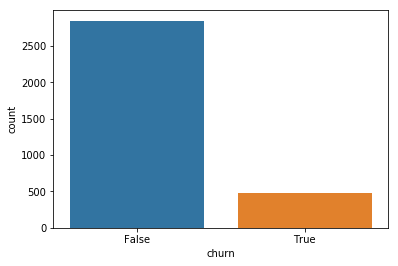

In [19]:
sns.countplot(churn.churn)
#how many people got the plan

In [20]:
churn.shape

(3333, 20)

In [22]:
churn.churn.sum()
#total amount of churned 

483

In [24]:
churn.groupby(['intl_plan', 'churn'])['churn'].count()

intl_plan  churn
no         False    2664
           True      346
yes        False     186
           True      137
Name: churn, dtype: int64

In [26]:
churn.groupby('state')['custserv_calls'].count().nlargest(10)
#who are the complainers 

state
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: custserv_calls, dtype: int64

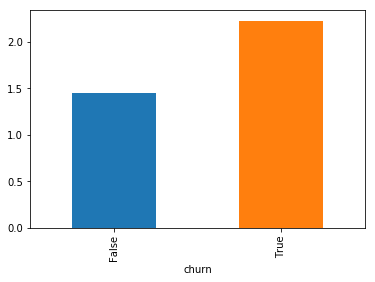

In [27]:
churn.groupby('churn')['custserv_calls'].mean().plot(kind = 'bar')
#selected the avg amount of custserv calls that people churned vs not churned make

In [28]:
churn['call_sum'] = churn.day_calls + churn.eve_calls + churn.night_calls + churn.intl_calls

In [30]:
churn['call_sum'].describe()
#will be a float or int

count    3333.000000
mean      305.137114
std        34.448164
min       191.000000
25%       282.000000
50%       305.000000
75%       328.000000
max       416.000000
Name: call_sum, dtype: float64

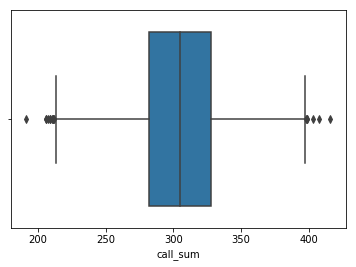

In [31]:
sns.boxplot(churn.call_sum)

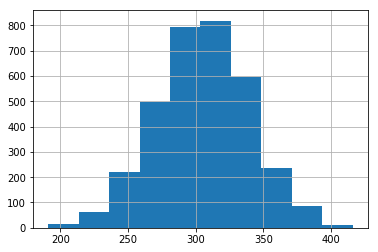

In [32]:
churn.call_sum.hist()

# Webscraping Intro

In [34]:
%%HTML 
<h1>Heading</h1>
<p>This is a paragraph <strong>word!!</strong. </p>

In [35]:
url = 'https://www.yelp.com/biz/taim-west-village-new-york?osq=falafel'

In [36]:
from bs4 import BeautifulSoup
import requests

In [37]:
response = requests.get(url)

In [38]:
response
#know it works cause 200 code

<Response [200]>

In [40]:
response.text[:100]

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie'

In [41]:
soup = BeautifulSoup(response.text, 'html.parser')
#find method

In [42]:
soup.find('span')
#top span tag

<span class="pseudo-input_text">Find</span>

In [44]:
soup.find_all('span'
              #didnt feel like dealing w all that data

SyntaxError: unexpected EOF while parsing (<ipython-input-44-f5d1f1c9ce0e>, line 1)

In [45]:
soup.find('a')

<a href="#header_find_form" rel="nofollow">
                        Skip to Search Form
                    </a>

In [47]:
soup.find('a', {'data-analytics-label': 'biz-name'}).text

'Taim West Village'

In [48]:
rests = soup.find_all('a', {'data-analytics-label': 'biz-name'})

In [49]:
for rest in rests:
    print(rest.text)

Taim West Village
Superiority Burger
Divya’s Kitchen
Mamoun’s Falafel
Dirt Candy
XYST
Nix
Red Bamboo
Vish - Vegetarian Hummus
La Maison du Croque Monsieur
Le Botaniste
Taim West Village
